# Sierpinski's Triangle

```
Author:
Zach Wolpe
zachcolinwolpe@gmail.com
zach.world
```

Sierpinski's triangle is an algorithm that demonstrates an interesting property of randomness.

###### The key take-away is that a seamingly complex pattern emerges from an extremely simple - partially random - pattern. What other complex structures could be broken down to such a simple mechanism?

The Sierpinski's triangle works with 3 points, however other interest patterns can emerge with more (K) points. Below are the steps to the algorithm.

## The Algorithm
Here are the steps for the 3 (and K) dimensional case:
    1. Randomly place 3 points on the plane.
    2. Pick a random starting point on the plane and set as the current location.
    3. Select one of the three nodes AT RANDOM and set as the new location.
    4. Calculate half-way between the current and new location (Euclidean distance).
    5. Mark the half-way point.
    5. Set the location of the half-way point as the new current location.
    6. Repeat steps 3-to-5 many times (10'000+)
    
Intuitively, we do not expect anything interesting to arise from these random pattern.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy.geometry import Point

plt.style.use('seaborn-darkgrid')
%matplotlib inline

## Generate 3 points at Random

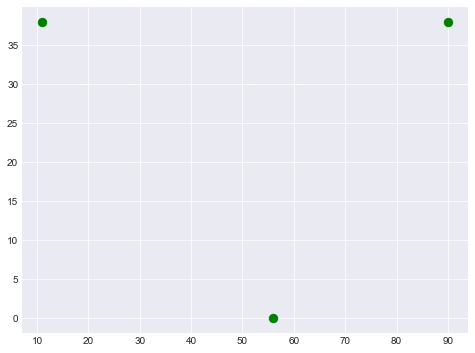

In [39]:
# generate random points
def scatterRandomPoints(n=3):
    x = np.random.randint(100, size = (2, n))
    plt.scatter(*x, c='g', s=70)
    return x, n
    
plt.figure(figsize=(8,6))
x, n = scatterRandomPoints()
plt.show()

## Perform the Algorithm 

Randomize between the points, moving half way between each, following the algorithm

In [40]:
# define the n points (start with 3 points)
a = x[0][0], x[1][0]
b = x[0][1], x[1][1]
c = x[0][2], x[1][2]

# define sampling list
List = ['a','b','c']


# function to calculate midpoints 
def midpoint(a,b):
    return ((a[0] + b[0])/2, (a[1] + b[1])/2)



def sierpinski_triangle(a, b, c, iterations=10000):
    # empty list of new points
    new_points = []
    
    # set initial location
    current_location = a
    
    for i in range(iterations):
    
        # pick point at random and set as new location
        choice = np.random.choice(List)
        if (choice == 'a'): new_location = a
        if (choice == 'b'): new_location = b
        if (choice == 'c'): new_location = c

        # set new current location as midpoint & record
        current_location = midpoint(current_location, new_location)
        new_points.append(current_location)

    return new_points 

## Results

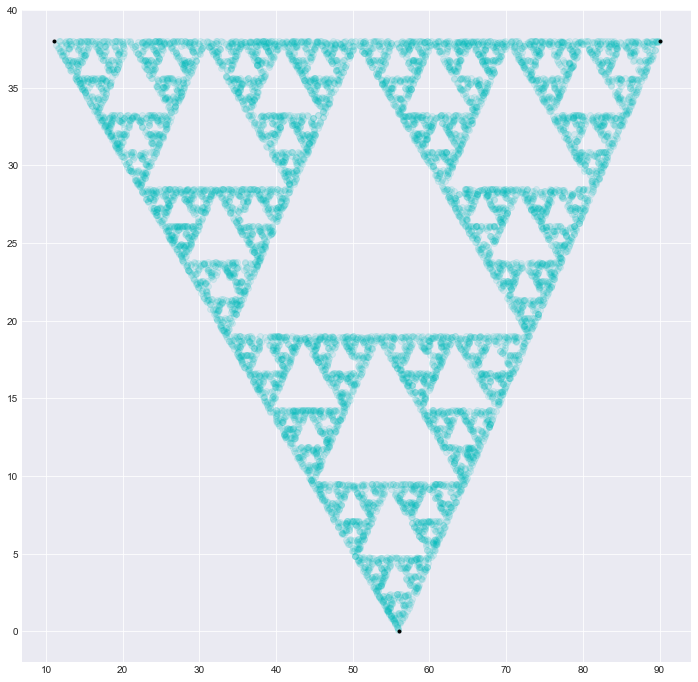

In [43]:
# call function
simulations = sierpinski_triangle(a,b,c)

# print results
plt.figure(figsize=(12,12))
plt.scatter(*zip(*simulations), c='c', alpha=0.1)
plt.scatter(*x, c='black', marker='.')
plt.show()  

# Conclusion

Yes that appeared through our randomising algorithm. This type of pattern is called a Sierpinski Triangle and is an example of a fractal (a pattern that repeats itself indefinitely). 

# Algorithm supporting K nodes

can we write an algorithm that dynamically chances, allowing for any number of input points.

In [7]:
# generate random points
def generate_random_points(n=3):

    x = np.random.randint(100, size = (2, n))
    return x, n

In [8]:
def midpoint(a,b):
    return ((a[0] + b[0])/2, (a[1] + b[1])/2)


def K_node_simulation(data, iterations=10000):
    """
    locate points by their access.
    
    Args:
        data: 2d array (points) 
        iterations: number of iternations to run
    """
    # get shape
    K = data.shape[1]
    
    # initialize starting point
    current_location = data[0][0], data[1][0]
    
    
    new_points = []
    for i in range(iterations):
    
        # pick point at random
        i = np.random.choice(range(K))
        
        # thus select corresponding new location
        new_location = data[0][i], data[1][i]

        # set new current location as midpoint & record
        current_location = midpoint(current_location, new_location)
        new_points.append(current_location)

    return new_points 

## run K node function

change the variable 'points' and run the code to see newly generated pattern

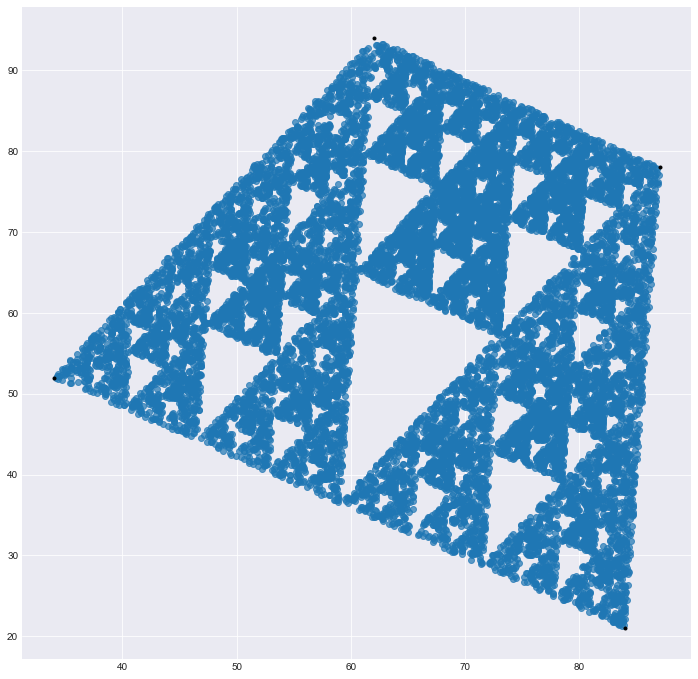

In [33]:
# select number of points
points = 4

# generate data
x,n = generate_random_points(points)

# run function 
points = K_node_simulation(x, iterations=20000)

# plot results
plt.figure(figsize=(12,12))
plt.scatter(*zip(*points), alpha=0.7)
plt.scatter(*x, c='black', marker='.')
plt.show() 

# Barnley's fern

A more complex example of an algorithm that depends on randomness and produces marvelous results is 'Barnley's fern'.

Essentially we have 6 starting points, forming 2 triangles, and move between the points with some known probability - again calculating and marking midpoints.

reference:
https://en.wikipedia.org/wiki/Barnsley_fern

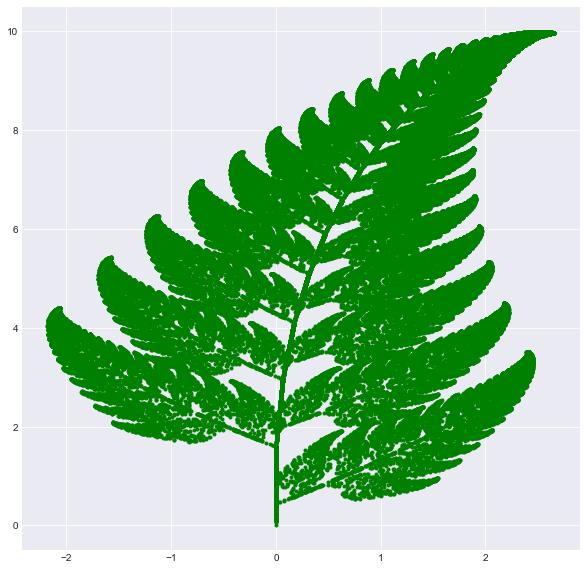

In [8]:
import random
import matplotlib.pyplot as plt

X = [0]
Y = [0]
for n in range(100000):
    r = random.uniform(0, 100)
    if r < 1.0:
        x = 0
        y = 0.16*Y[n-1]
    elif r < 86.0:
        x = 0.85*X[n-1] + 0.04*Y[n-1]
        y = -0.04*X[n-1] + 0.85*Y[n-1]+1.6
    elif r < 93.0:
        x = 0.2*X[n-1] - 0.26*Y[n-1]
        y = 0.23*X[n-1] + 0.22*Y[n-1] + 1.6
    else:
        x = -0.15*X[n-1] + 0.28*Y[n-1]
        y = 0.26*X[n-1] + 0.24*Y[n-1] + 0.44
    X.append(x);Y.append(y)

'''Make a plot'''
plt.figure(figsize = [10,10])
plt.scatter(X,Y,color = 'g',marker = '.')
plt.show()